### 数据加载和可视化过程

#### 数据加载



In [1]:
import pandas as pd

file_path = "附件1 (Attachment 1).xlsx"
data = pd.read_excel(file_path)
data.head()

,电磁辐射 (EMR),时间 (time),类别 (class)
0,40.00,2019-01-09 05:01:29,D/E
1,43.59,2019-01-09 05:01:29,D/E
2,35.00,2019-01-09 05:02:00,D/E
3,34.00,2019-01-09 05:02:31,D/E
4,36.00,2019-01-09 05:03:02,D/E


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sheet1_data = pd.read_excel(file_path, sheet_name=0)  
sheet2_data = pd.read_excel(file_path, sheet_name=1) 

### 数据可视化
#### 使用 matplotlib 和 seaborn 库来创建数据的密度图，比较两个数据集（电磁辐射和声波强度）的分布情况。

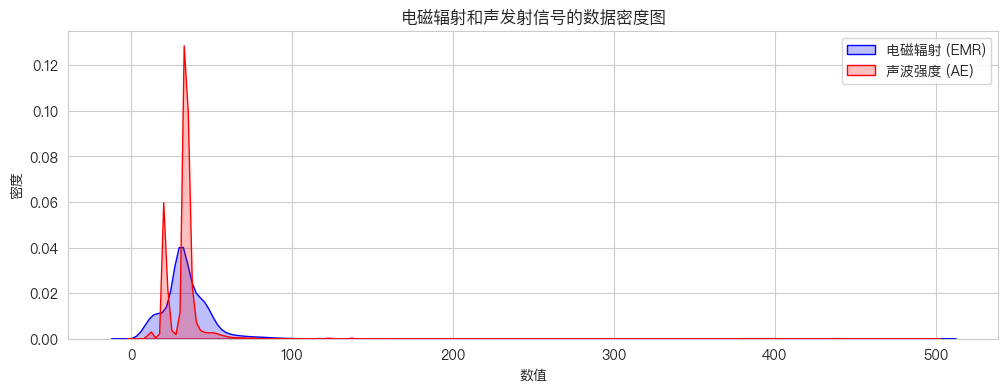

In [4]:
plt.figure(figsize=(12, 4))

sns.kdeplot(sheet1_data.iloc[:, 0], shade=True, color='blue', label='电磁辐射 (EMR)')
sns.kdeplot(sheet2_data.iloc[:, 0], shade=True, color='red', label='声波强度 (AE)')

font_path = '/System/Library/Fonts/PingFang.ttc' 
plt.rcParams['font.sans-serif'] = ['PingFang HK']
plt.rcParams['axes.unicode_minus'] = False
plt.title('电磁辐射和声发射信号的数据密度图')
plt.xlabel('数值')
plt.ylabel('密度')
plt.legend()

plt.show()

### 数据筛选和时间序列可视化

#### 数据筛选
从两个不同的数据集中筛选出属于特定类别 'C' 的数据，这一类别代表干扰信号数据。并作出可视化


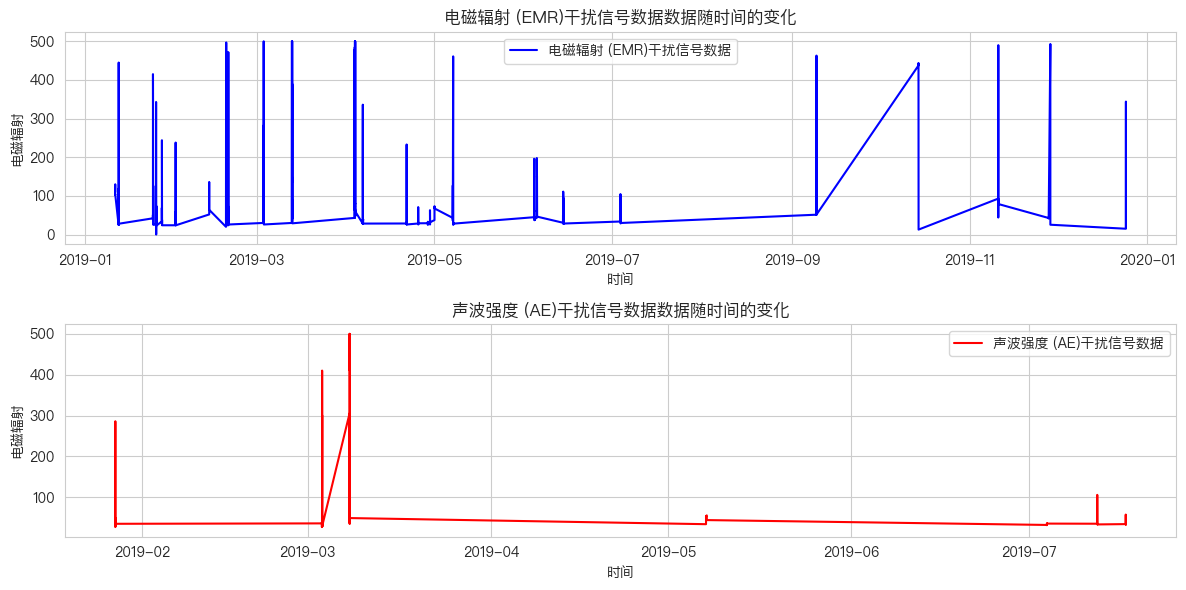

In [5]:
sheet1_c = sheet1_data[sheet1_data['类别 (class)'] == 'C']
sheet2_c = sheet2_data[sheet2_data['类别 (class)'] == 'C']

sheet1_c['时间 (time)'] = pd.to_datetime(sheet1_c['时间 (time)'])
sheet2_c['时间 (time)'] = pd.to_datetime(sheet2_c['时间 (time)'])

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1) 
plt.plot(sheet1_c['时间 (time)'], sheet1_c['电磁辐射 (EMR)'], label='电磁辐射 (EMR)干扰信号数据', color='blue')
plt.title('电磁辐射 (EMR)干扰信号数据数据随时间的变化')
plt.xlabel('时间')
plt.ylabel('电磁辐射')
plt.legend()

plt.subplot(2, 1, 2) 
plt.plot(sheet2_c['时间 (time)'], sheet2_c['声波强度 (AE)'], label='声波强度 (AE)干扰信号数据', color='red')
plt.title('声波强度 (AE)干扰信号数据数据随时间的变化')
plt.xlabel('时间')
plt.ylabel('电磁辐射')
plt.legend()

plt.tight_layout()
plt.show()

### 一、基本特征

#### 干扰信号特征
此特征是一个二元分类指标，用于标示每个观测值是否被分类为干扰信号（类别 'C'）。

$$
\text{干扰信号} = \begin{cases} 
1 & \text{if 类别 (class) = 'C'} \\
0 & \text{otherwise}
\end{cases}
$$

### 二、时间序列衍生特征

#### 2.1滚动窗口特征 (Rolling Features)
滚动窗口特征通过在固定大小的窗口上应用统计函数来提取时间序列数据的趋势和波动性信息。窗口以固定的长度在数据上滚动，为每个窗口计算统计值。

##### 滚动平均 (Rolling Mean)
计算窗口内所有数据点的算术平均值，用于平滑时间序列数据，减少随机波动，突出显示趋势。

$$
\text{rolling\_mean}_t = \frac{1}{n} \sum_{i=t-n+1}^{t} x_i
$$
其中 \( n \) 是窗口大小，\( x_i \) 是第 \( i \) 个数据点。

##### 滚动标准差 (Rolling Standard Deviation)
计算窗口内数据点的标准差，衡量数据点相对于其平均值的离散程度。

$$
\text{rolling\_std}_t = \sqrt{\frac{1}{n-1} \sum_{i=t-n+1}^{t} (x_i - \text{rolling\_mean}_t)^2}
$$

##### 滚动方差 (Rolling Variance)
计算窗口内数据点的方差，与标准差类似，方差是度量数据分散性的另一种方式，保留数据单位的平方。

$$
\text{rolling\_var}_t = \frac{1}{n-1} \sum_{i=t-n+1}^{t} (x_i - \text{rolling\_mean}_t)^2
$$

#### 2.2指数加权移动平均 (EWMA)
EWMA 是一种加权平均技术，其中较新的数据点具有较高的权重，反映了数据的最近趋势。

##### EWMA 平均
$$
\text{ewm\_mean}_t = \frac{\sum_{i=0}^{t} (1 - \alpha)^i x_{t-i}}{\sum_{i=0}^{t} (1 - \alpha)^i}
$$
其中 \( \alpha \) 是平滑系数，\( \alpha = \frac{2}{\text{span} + 1} \)，\(\text{span}\) 是给定的跨度。

##### EWMA 标准差
$$
\text{ewm\_std}_t = \sqrt{\text{ewm\_var}_t}
$$
其中方差 \(\text{ewm\_var}_t\) 的计算为：
$$
\text{ewm\_var}_t = \frac{\sum_{i=0}^{t} (1 - \alpha)^i (x_{t-i} - \text{ewm\_mean}_{t-i})^2}{\sum_{i=0}^{t} (1 - \alpha)^i}
$$

#### 2.3 拉格特征 (Lagged Features)
拉格特征是指将数据点的先前观测值用作当前观测值的特征，这有助于捕捉时间序列的自相关性。

$$
\text{lag\_1}_t = x_{t-1}
$$
$$
\text{lag\_2}_t = x_{t-2}
$$

### 三、季节特征

#### 星期几 (Day of Week)
提取观测日期的星期几，作为分析周内行为模式的特征。

$$
\text{day\_of\_week} = \text{datetime.weekday()}(\text{time})
$$

#### 是否为周末 (Is Weekend)
根据星期几的值，判断是否为周末。

$$
\text{is\_weekend} = \begin{cases} 
1 & \text{if day\_of\_week} \geq 5 \\
0 & \text{otherwise}
\end{cases}
$$



In [6]:
import numpy as np

def calculate_features(data, value_col, window_size=3, sampling_rate=1):
    features_df = pd.DataFrame()
    
    # 添加干扰信号特征
    features_df['干扰信号'] = (data['类别 (class)'] == 'C').astype(int)
    
    # 基本滚动窗口特征
    features_df['rolling_mean'] = data[value_col].rolling(window=window_size).mean()
    features_df['rolling_std'] = data[value_col].rolling(window=window_size).std()
    features_df['rolling_var'] = data[value_col].rolling(window=window_size).var()
    
    # 指数平滑特征
    features_df['ewm_mean'] = data[value_col].ewm(span=window_size).mean()
    features_df['ewm_std'] = data[value_col].ewm(span=window_size).std()
    
    # 拉格特征
    features_df['lag_1'] = data[value_col].shift(1)
    features_df['lag_2'] = data[value_col].shift(2)
    
    # 季节性特征 - 时间维度
    data['时间 (time)'] = pd.to_datetime(data['时间 (time)'])  # 确保时间列的数据类型为 datetime
    features_df['day_of_week'] = data['时间 (time)'].dt.weekday
    features_df['is_weekend'] = (features_df['day_of_week'] >= 5).astype(int)
    
    # 连接原始数据和衍生特征
    features_df.index = data.index
    result = pd.concat([data, features_df], axis=1)
    return result

# 计算每个工作表的特征，并保存结果
sheet1_features = calculate_features(sheet1_data, '电磁辐射 (EMR)')
sheet2_features = calculate_features(sheet2_data, '声波强度 (AE)')


### 特征相关性分析及热力图可视化

#### 计算特征相关系数矩阵

##### 皮尔逊相关系数的计算公式
$$
\rho_{X,Y} = \frac{\text{cov}(X,Y)}{\sigma_X \sigma_Y}
$$
其中，\(\text{cov}(X,Y)\) 是 X 和 Y 的协方差，\(\sigma_X\) 和 \(\sigma_Y\) 分别是 X 和 Y 的标准差。

#### 从数据集中移除非数值特征
为了正确计算相关系数，需要从数据集中移除非数值特征：'类别 (class)' 和 '时间 (time)'。


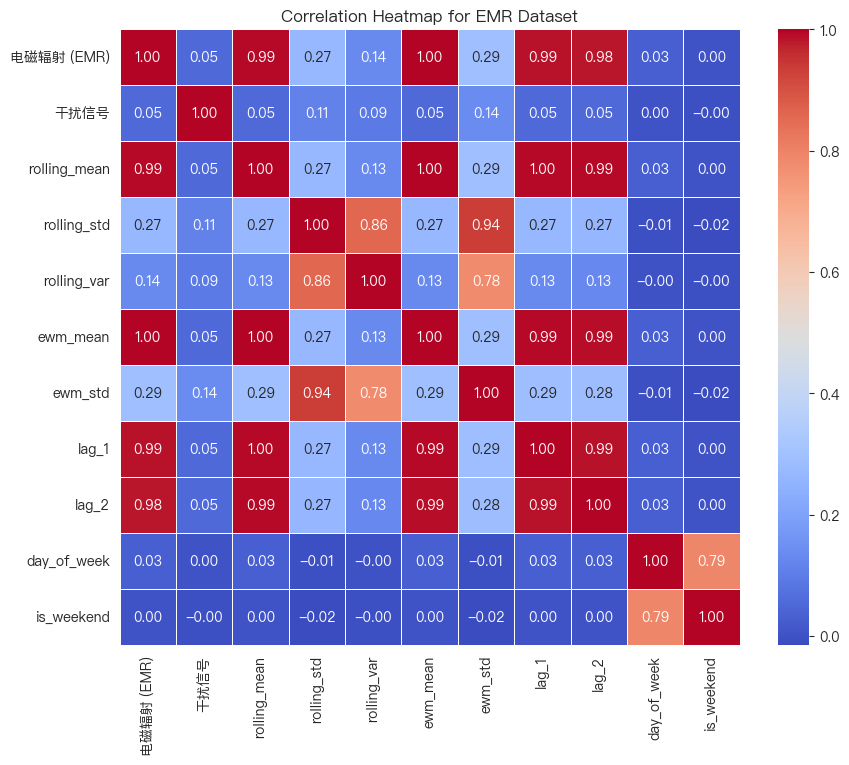

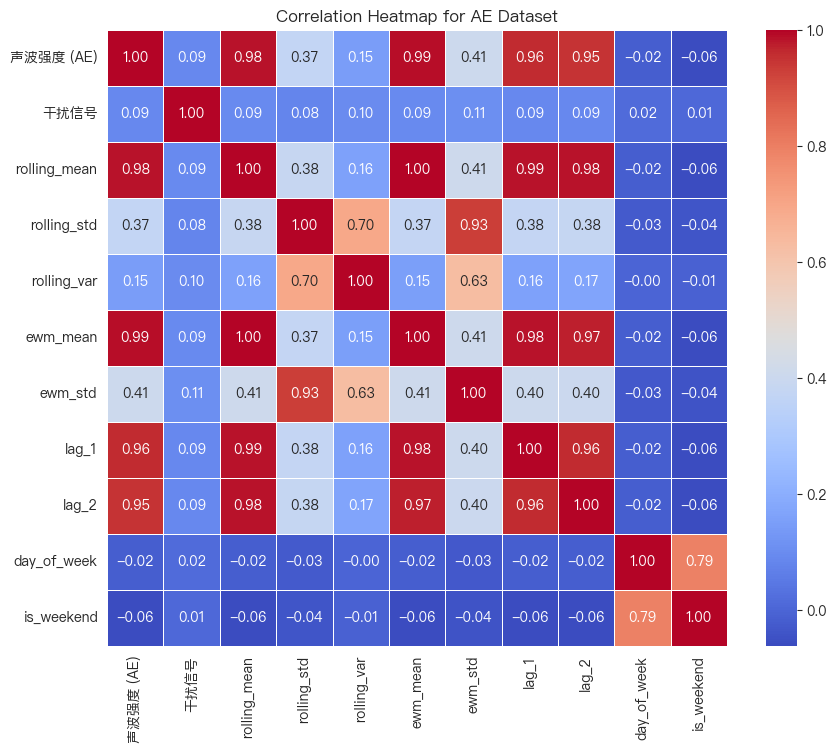

In [7]:
# 计算两个数据集的特征相关系数矩阵
corr_emr = sheet1_features.drop(['类别 (class)', '时间 (time)'], axis=1).corr()
corr_ae = sheet2_features.drop(['类别 (class)', '时间 (time)'], axis=1).corr()

# 绘制电磁辐射 (EMR) 数据集的特征相关热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_emr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for EMR Dataset')
plt.show()

# 绘制声波强度 (AE) 数据集的特征相关热力图
plt.figure(figsize=(10, 8))
sns.heatmap(corr_ae, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap for AE Dataset')
plt.show()


### 绘制混淆矩阵 (Confusion Matrix) 的函数
（这部分不需要写进论文中，清楚是做什么的即可）

#### 功能描述
`plot_confusion_matrix` 函数用于绘制和展示混淆矩阵，这是一个常用于评估分类模型性能的工具。该函数能够根据用户的选择显示归一化或非归一化的混淆矩阵。


In [8]:
import numpy as np

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    这个函数绘制并返回混淆矩阵。
    如果 normalize=True，混淆矩阵将会归一化。
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("归一化混淆矩阵")
    else:
        print('非归一化混淆矩阵')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('实际类别')
    plt.xlabel('预测类别')


### 模型训练与评估过程

#### 数据预处理和模型训练
在训练机器学习模型之前，首先进行数据预处理，包括数据拆分和缺失值处理。

1. **数据拆分**：
   使用 `train_test_split` 从 sklearn 分割数据为训练集和测试集，测试集大小为30%。

2. **缺失值处理**：
   使用 `SimpleImputer` 填充缺失值，这里采用平均数策略。

3. **模型训练**：
   使用 `RandomForestClassifier` 训练模型。随机森林是一个包含多个决策树的分类器，每棵树的结果被集成以提高整体性能。

### 性能评估

1. **准确率 (Accuracy)**:
   准确率是分类正确的样本占总样本数的比率，是最直观的性能指标。（可查找公式进行补充）

2. **分类报告 (Classification Report)**:
   这个报告为每个类提供了精确率（Precision），召回率（Recall）和F1分数。（可查找公式进行补充）

3. **混淆矩阵 (Confusion Matrix)**:（可查找公式进行补充）


### ROC 曲线与AUC

**ROC 曲线 (Receiver Operating Characteristic Curve)**:
   ROC 曲线显示了在不同阈值设置下，模型的真正率（True Positive Rate, TPR）和假正率（False Positive Rate, FPR）之间的关系。真正率也称为灵敏度，假正率是1减去特异性。（可查找公式进行补充）

   这条曲线越靠近左上角，模型的性能通常认为越好。



电磁辐射 (EMR) 模型评价指标:
准确率: 0.8005019642077695
分类报告:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    181689
           1       0.04      0.84      0.07      1591

    accuracy                           0.80    183280
   macro avg       0.52      0.82      0.48    183280
weighted avg       0.99      0.80      0.88    183280

混淆矩阵:
[[145377  36312]
 [   252   1339]]
归一化混淆矩阵


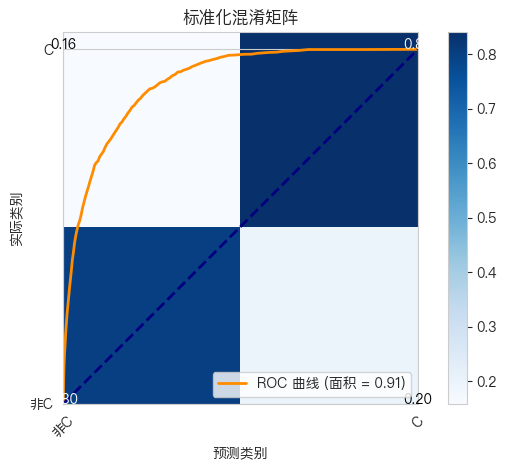

声波强度 (AE) 模型评价指标:
准确率: 0.8874011287124398
分类报告:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    183154
           1       0.02      0.87      0.03       418

    accuracy                           0.89    183572
   macro avg       0.51      0.88      0.49    183572
weighted avg       1.00      0.89      0.94    183572

混淆矩阵:
[[162537  20617]
 [    53    365]]
归一化混淆矩阵


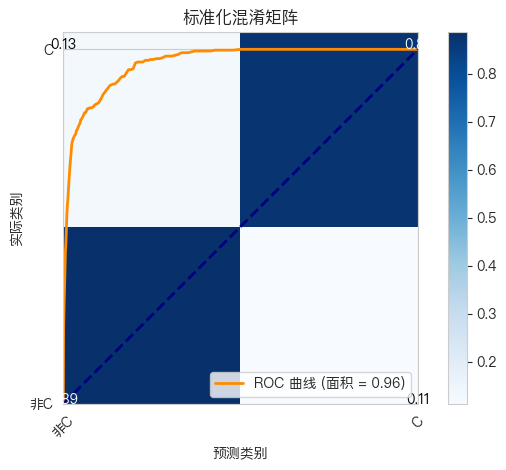

(RandomForestClassifier(random_state=42), SimpleImputer())

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import itertools
from imblearn.under_sampling import RandomUnderSampler

def train_and_return_model(features, target):
    # 分割数据为训练集和测试集
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

    # 创建一个填充实例并转换训练和测试数据
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train)
    X_test_imputed = imputer.transform(X_test)

    # 应用欠采样
    rus = RandomUnderSampler(random_state=42)
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train_imputed, y_train)

    # 创建并训练分类器
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train_resampled, y_train_resampled)

    # 在测试集上进行预测
    y_pred = clf.predict(X_test_imputed)

    # 输出模型性能
    print("准确率:", accuracy_score(y_test, y_pred))
    print("分类报告:")
    print(classification_report(y_test, y_pred))
    print("混淆矩阵:")
    print(confusion_matrix(y_test, y_pred))
    
    # 计算 ROC 曲线的数据
    fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test_imputed)[:, 1])
    roc_auc = auc(fpr, tpr)
    
    # 绘制 ROC 曲线图
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC 曲线 (面积 = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('假阳性率')
    plt.ylabel('真阳性率')
    plt.title('ROC 曲线')
    plt.legend(loc="lower right")
    
    # 绘制混淆矩阵图
    plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=['非C', 'C'], normalize=True, title='标准化混淆矩阵')
    
    plt.show()
    
    return clf, imputer

X_emr = sheet1_features.drop(['干扰信号', '类别 (class)', '时间 (time)'], axis=1)
y_emr = sheet1_features['干扰信号']

print("电磁辐射 (EMR) 模型评价指标:")
train_and_return_model(X_emr, y_emr)

X_ae = sheet2_features.drop(['干扰信号', '类别 (class)', '时间 (time)'], axis=1)
y_ae = sheet2_features['干扰信号']

print("声波强度 (AE) 模型评价指标:")
train_and_return_model(X_ae, y_ae)


### 数据加载与特征工程

#### 数据加载
从 附件2 文件中加载两个不同的数据集，分别为电磁辐射 (EMR) 和声波强度 (AE)。
#### 特征提取
与前文相同，提取相同特征


In [10]:
EMR_df = pd.read_excel("./附件2 (Attachment 2).xlsx", sheet_name='EMR',skiprows=1)
AE_df = pd.read_excel("./附件2 (Attachment 2).xlsx", sheet_name='AE', skiprows=1)
EMR_df = EMR_df.iloc[:,[0,1]]
EMR_df = EMR_df.dropna()
AE_df = AE_df.iloc[:,[0,1]]
AE_df = AE_df.dropna()

In [11]:
def calculate_features(data, value_col, window_size=3, sampling_rate=1):
    features_df = pd.DataFrame()
    
    # 基本滚动窗口特征
    features_df['rolling_mean'] = data[value_col].rolling(window=window_size).mean()
    features_df['rolling_std'] = data[value_col].rolling(window=window_size).std()
    features_df['rolling_var'] = data[value_col].rolling(window=window_size).var()
    
    # 指数平滑特征
    features_df['ewm_mean'] = data[value_col].ewm(span=window_size).mean()
    features_df['ewm_std'] = data[value_col].ewm(span=window_size).std()
    
    # 拉格特征
    features_df['lag_1'] = data[value_col].shift(1)
    features_df['lag_2'] = data[value_col].shift(2)
    
    # 季节性特征 - 时间维度
    data['时间 (time)'] = pd.to_datetime(data['时间 (time)'])  # 确保时间列的数据类型为 datetime
    features_df['day_of_week'] = data['时间 (time)'].dt.weekday
    features_df['is_weekend'] = (features_df['day_of_week'] >= 5).astype(int)
    
    # 连接原始数据和衍生特征
    features_df.index = data.index
    result = pd.concat([data, features_df], axis=1)
    return result
EMR_df_processed = calculate_features(EMR_df, value_col='电磁辐射 (EMR)')
AE_df_processed = calculate_features(AE_df, value_col='声波强度 (AE)')


### 模型训练与评估过程

#### 数据预处理和模型训练
在训练机器学习模型之前，首先进行数据预处理，包括数据拆分、缺失值处理，以及应对类不平衡的欠采样。

1. **数据拆分**：
   使用 `train_test_split` 从 sklearn 分割数据为训练集和测试集，测试集大小为30%。

2. **缺失值处理**：
   使用 `SimpleImputer` 填充缺失值，这里采用平均数策略。

3. **欠采样处理**：
   为了应对类不平衡问题，使用 `RandomUnderSampler` 进行欠采样。通过减少多数类样本的数量，使得每个类在训练数据中的比例达到均衡，从而帮助模型更好地学习到少数类的特征。

4. **模型训练**：
   使用 `RandomForestClassifier` 训练模型。随机森林是一个包含多个决策树的分类器，每棵树的结果被集成以提高整体性能。

### 性能评估

1. **准确率 (Accuracy)**:
   准确率是分类正确的样本占总样本数的比率，是最直观的性能指标。
   $$ \text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}} $$

2. **分类报告 (Classification Report)**:
   这个报告为每个类提供了精确率（Precision），召回率（Recall）和F1分数。
   $$ \text{Precision} = \frac{TP}{TP + FP} $$
   $$ \text{Recall} = \frac{TP}{TP + FN} $$
   $$ F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$

3. **混淆矩阵 (Confusion Matrix)**:
   混淆矩阵是评估分类器性能的工具，显示了每个类别的实际与预测数量。
   $$ \text{Confusion Matrix} $$

### ROC 曲线与AUC

**ROC 曲线 (Receiver Operating Characteristic Curve)**:
   ROC 曲线显示了在不同阈值设置下，模型的真正率（True Positive Rate, TPR）和假正率（False Positive Rate, FPR）之间的关系。
   $$ \text{TPR} = \frac{TP}{TP + FN} $$
   $$ \text{FPR} = \frac{FP}{FP + TN} $$

   这条曲线越靠近左上角，模型的性能通常认为越好。


准确率: 0.8005019642077695
分类报告:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89    181689
           1       0.04      0.84      0.07      1591

    accuracy                           0.80    183280
   macro avg       0.52      0.82      0.48    183280
weighted avg       0.99      0.80      0.88    183280

混淆矩阵:
[[145377  36312]
 [   252   1339]]
归一化混淆矩阵


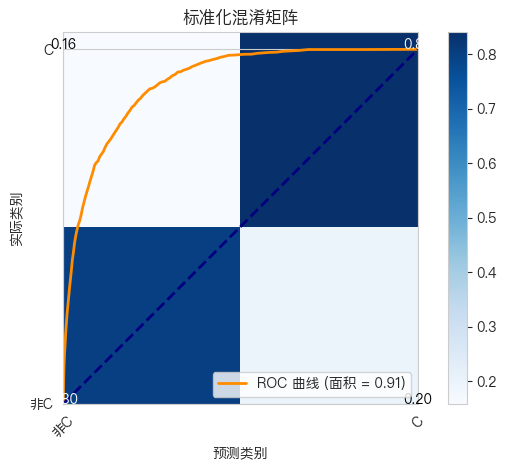

准确率: 0.8874011287124398
分类报告:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94    183154
           1       0.02      0.87      0.03       418

    accuracy                           0.89    183572
   macro avg       0.51      0.88      0.49    183572
weighted avg       1.00      0.89      0.94    183572

混淆矩阵:
[[162537  20617]
 [    53    365]]
归一化混淆矩阵


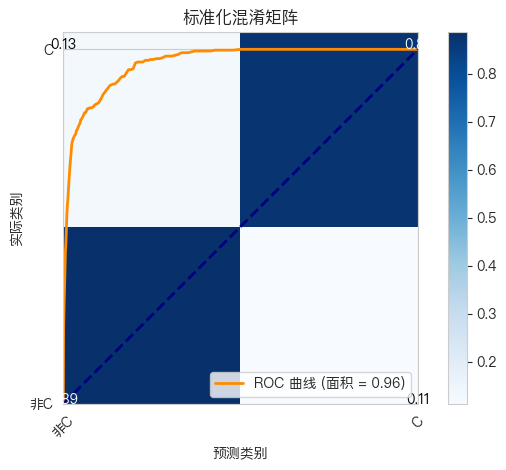

In [12]:
clf_emr, imputer_emr = train_and_return_model(X_emr, y_emr)
clf_ae, imputer_ae = train_and_return_model(X_ae, y_ae)

In [13]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer


# 转换时间列为 datetime 类型
EMR_df_processed['时间 (time)'] = pd.to_datetime(EMR_df_processed['时间 (time)'])
AE_df_processed['时间 (time)'] = pd.to_datetime(AE_df_processed['时间 (time)'])

# 保存时间列以备后用
EMR_times = EMR_df_processed['时间 (time)'].copy()
AE_times = AE_df_processed['时间 (time)'].copy()

# 预处理数据（移除时间列进行预测）
EMR_df_imputed = imputer_emr.transform(EMR_df_processed.drop(columns=['时间 (time)']))
AE_df_imputed = imputer_ae.transform(AE_df_processed.drop(columns=['时间 (time)']))

# 使用模型进行预测
EMR_df_processed['干扰信号'] = clf_emr.predict(EMR_df_imputed)
AE_df_processed['干扰信号'] = clf_ae.predict(AE_df_imputed)

# 将时间列加回数据框
EMR_df_processed['时间 (time)'] = EMR_times
AE_df_processed['时间 (time)'] = AE_times

# 定义函数来查找和保存干扰信号的时间区间
def find_and_save_interference_intervals(df, filename):
    df['start'] = (df['干扰信号'] == 1) & (df['干扰信号'].shift(1) != 1)
    df['end'] = (df['干扰信号'] == 1) & (df['干扰信号'].shift(-1) != 1)
    
    intervals = []
    start_time = None
    for _, row in df.iterrows():
        if row['start']:
            start_time = row['时间 (time)']
        if row['end'] and start_time is not None:
            end_time = row['时间 (time)']
            intervals.append([start_time, end_time])
            start_time = None
    
    intervals_df = pd.DataFrame(intervals, columns=['Start Time', 'End Time'])
    intervals_df.to_csv(filename, index=False)
    print(f"干扰信号时间区间已保存至 '{filename}'.")

# 对 EMR 和 AE 数据集执行干扰区间查找和保存
find_and_save_interference_intervals(EMR_df_processed, 'EMR_interference_intervals.csv')
find_and_save_interference_intervals(AE_df_processed, 'AE_interference_intervals.csv')


干扰信号时间区间已保存至 'EMR_interference_intervals.csv'.
干扰信号时间区间已保存至 'AE_interference_intervals.csv'.


### 对于文章写作，可适当查找：随机森林（Random Forest）、SimpleImputer、ROC曲线（ROC Curve）、AUC（Area Under the Curve）、混淆矩阵（Confusion Matrix）、欠采样（RandomUnderSampler）、时间序列涉及到的特征进行补充写作
### ！！！对于我的建模过程，结果一定要写，但是中间过程选择性地写，全部都写会造成篇幅过长，太过赘述